In [1]:
# imports for exploratory dataframe manipulation
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
import cv2
from sklearn.model_selection import train_test_split

In [191]:
def get_img_paths(base_dir, ignore_filetypes=['.tplot_confusion_matrix.cpp', '.gif']):
    """
    Retrieves paths to all files given a base directory.
    
    Parameters:
        base_dir (string): relative path to the directory with folders containing images
        *kwargs
        Not supported: ignore_filetypes (list of strings) filetypes to exclude from output
        Not supported: type_folders (dictionary) folders that identify different filetypes and add identifiers to add to output
    Returns:
        paths (list of tuples): relative paths (string) to files with identifiers (int)
    """
    absent_paths = []
    present_paths = []

    for root, dirs, files in os.walk(base_dir):
        #not removing undesired files
#         # remove undesired files
#         for file in files:
#             for file_type in ignore_filetypes:
#                 if file_type == file[-4:]:
#                     files.remove(file)
                    
        if files:
        
            for file in files:
                full_path = os.path.join(root, file)
                
                if 'NO' in full_path:
                    absent_paths.append((full_path, 0))

                elif 'YES' in full_path:
                    present_paths.append((full_path, 1))

    #         if type_folders:
    #             for key, value in type_folders.items():
    #                 if key in root:

    #         print('root: ', root)
    #         print('files: ', files[:5], len(files))
    #         print('paths: ', paths)
#     absent_paths.extend(present_paths)
    return absent_paths, present_paths

In [192]:
basedir = "D:\MRI_data\Kaggle" 
absent, present = get_img_paths(basedir)

In [193]:
len(absent + present)

3516

In [194]:
len(present)

2919

In [7]:
def get_data(input_data, img_size=150):
    """
    Retrieves image data with classification, and path

    Parameters:
        input_data (list of tuples): paths leading to image data to be loaded and classification

    Returns:
        data (np.array of tuples): image data (np.array) with classification (int), and path (string)
    """

    data = []

    for i in range(len(input_data)):
        path = input_data[i][0]
        class_num = input_data[i][1]

        #         for img in os.listdir(path):

        try:
            img_arr = cv2.imread(path)
            resized_arr = cv2.resize(img_arr, (img_size, img_size))  # Reshaping images to preferred size
            data.append([resized_arr, class_num, path])

        except Exception as e:
            print(f'{e} on path {path}')

    return np.array(data)

In [8]:
present[0]

('D:\\MRI_data\\Kaggle\\classification_images\\Testing\\YES\\glioma_tumor\\frontal_section\\image(1).jpg',
 1)

In [9]:
# tumor_data = get_data(present)
# len(tumor_data)

2919

In [10]:
import time

In [11]:
start = time.time()
(tumor_data[0][0] == tumor_data[0][0]).all()
(tumor_data[2][0] == tumor_data[1][0]).all()
stop = time.time()

stop-start

0.0009605884552001953

## Use pillow to compare images

In [12]:
# # from https://stackoverflow.com/questions/35176639/compare-images-python-pil/56280735
# # import pillow to compare images
# from PIL import Image
# from PIL import ImageChops

In [13]:
# start = time.time()

# img1 = Image.open(present[0][0])
# img2 = Image.open(present[2][0])
# # img3 = Image.open(present1)
# diff = ImageChops.difference(img1, img2)


# stop = time.time()
# stop-start

## Train Test Split Data

In [14]:
# # not supported
# def custom_tts(data, train_val_test_percents=(0.8, 0.025, 0.175), random_state=2021):
#     """
#     This function takes a tuple of data and returns a tuple of train, test, and validation data
#     Input:
#         data (list/ array like) each entry contians a file path in position [0] and classification in position [1]
#         train_val_test_percents (triple) triple containing decimal representations of split percentages used in train test split
#         *kwargs

#     Returns:
#         x_train
#         x_val
#         x_test

#     """
#     # Extract percentages used in split from triple
#     train_pct = train_val_test_percents[0]
#     test_pct = 1 - train_pct
#     val_pct = train_val_test_percents[0] / test_pct
#     paths = [d[0] for d in data]
#     types = [t[1] for t in data]
#     x_train, x_test, y_train, y_test = train_test_split(paths, types, train_size=train_pct, random_state=random_state)

#     x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=train_pct, random_state=random_state)

#     return x_train, x_val, x_test, y_train, y_val, y_test

In [15]:
# define train size for data set
# split before combining datasets
train_size = 0.8 # eighty percent
test_size = 0.15 # fifteen percent
val_size = 0.05 # five percent

# calculate test size for second split
test_size2 = test_size/(1-train_size)

# split absent paths into train and test
absent_train, absent_test = train_test_split(absent, train_size=train_size, random_state=2021)

# split absent test paths into test and validation
absent_test, absent_val = train_test_split(absent_test, train_size=test_size2, random_state=2021)

# split present paths into train and test
present_train, present_test = train_test_split(present, train_size=train_size, random_state=2021)

# split present paths into test and val
present_test, present_val = train_test_split(present_test, train_size=test_size2, random_state=2021)

In [16]:
print(f'''
Tumor Training Data: {len(present_train)}\n
Tumor Testing Data: {len(present_test)}\n
Tumor Validation Data: {len(present_val)}\n
Absent Training Data: {len(absent_train)}\n
Absent Testing Data: {len(absent_test)}\n
Absent Validation Data: {len(absent_val)}
''')


Tumor Training Data: 2335

Tumor Testing Data: 438

Tumor Validation Data: 146

Absent Training Data: 477

Absent Testing Data: 90

Absent Validation Data: 30



In [17]:
# combine train and test and val (respectively)
train = absent_train
train.extend(present_train)

test = absent_test
test.extend(present_test)

val = absent_val
val.extend(present_val)

# load data 

In [18]:
train_img_data = get_data(train)
train_img_len = len(train_img_data)

val_img_data = get_data(val)
val_img_len = len(val_img_data)

test_img_data = get_data(test)
test_img_len = len(test_img_data)

print(f"\nTrain images: {train_img_len}\nValidation images: {val_img_len}\nTest images: {test_img_len}")


Train images: 2812
Validation images: 176
Test images: 528


In [19]:
len(train)

2812

In [20]:
train[0]

('D:\\MRI_data\\Kaggle\\classification_images\\Training\\NO\\no_tumor\\horizontal_section\\image(51).jpg',
 0)

In [21]:
train_img_data[0][2]

'D:\\MRI_data\\Kaggle\\classification_images\\Training\\NO\\no_tumor\\horizontal_section\\image(51).jpg'

## Remove Duplicate Images

In [22]:
def remove_duplicates(data):
    '''
    Removes duplicate entries from list of data.
    
    Parameters:
        data (list of tuples): contains image data (np.array), classification (int) to compare to others within input data
        
    Returns:
        unique_list (np.array): array of unique image data (np.array) with classifcations (int)
        duplicate_list (np.array): array of duplicate image data (np.array) removed from input data
    
    '''

    unique_list = []
    duplicate_list = []
    # loop through original images
    for image in data:
        img = image[0]
        
        # informs function to append image
        is_unique = True
        
        # loop through new list
        for unique_image in unique_list:
            unique_img = unique_image[0]
            
            # check existing entries to new entry
            if (img == unique_img).all():
                is_unique = False
                print(f'duplicate found:{img[0][25:26]} and {unique_img[0][25:26]}')
                break
                
        # add to unique list if unique
        if is_unique:
            unique_list.append(image)
        
        else:
            duplicate_list.append(image)
            
    return np.array(unique_list), np.array(duplicate_list)

In [23]:
img1 = val_img_data[0]
img2 = val_img_data[1]
img3 = val_img_data[0]

In [24]:
(img1[0] == img3[0]).all()

True

In [25]:
train_img_data[0][2]

'D:\\MRI_data\\Kaggle\\classification_images\\Training\\NO\\no_tumor\\horizontal_section\\image(51).jpg'

In [26]:
unique_train_img, train_duplicate = remove_duplicates(train_img_data)
unique_val_img, val_duplicate = remove_duplicates(val_img_data)
unique_test_img, test_duplicate = remove_duplicates(test_img_data)

duplicate found:[[0 0 0]] and [[0 0 0]]
duplicate found:[[0 0 0]] and [[0 0 0]]
duplicate found:[[0 0 0]] and [[0 0 0]]
duplicate found:[[27 27 27]] and [[27 27 27]]
duplicate found:[[0 0 0]] and [[0 0 0]]
duplicate found:[[15 15 15]] and [[15 15 15]]
duplicate found:[[16 16 16]] and [[16 16 16]]
duplicate found:[[0 0 0]] and [[0 0 0]]
duplicate found:[[30 30 30]] and [[30 30 30]]
duplicate found:[[0 0 0]] and [[0 0 0]]
duplicate found:[[15 15 15]] and [[15 15 15]]
duplicate found:[[39 39 39]] and [[39 39 39]]
duplicate found:[[1 1 1]] and [[1 1 1]]
duplicate found:[[20 20 20]] and [[20 20 20]]
duplicate found:[[20 20 20]] and [[20 20 20]]
duplicate found:[[0 0 0]] and [[0 0 0]]
duplicate found:[[0 0 0]] and [[0 0 0]]
duplicate found:[[0 0 0]] and [[0 0 0]]
duplicate found:[[1 1 1]] and [[1 1 1]]
duplicate found:[[0 0 0]] and [[0 0 0]]
duplicate found:[[14 14 14]] and [[14 14 14]]
duplicate found:[[1 1 1]] and [[1 1 1]]
duplicate found:[[10 10 10]] and [[10 10 10]]
duplicate found:[[7 

In [27]:
len(unique_train_img)

2540

In [28]:
len(train_img_data)

2812

In [29]:
len(unique_val_img)

175

In [30]:
len(val_img_data)

176

In [31]:
len(unique_test_img)

510

In [32]:
len(test_img_data)

528

In [33]:
len(val)

176

In [35]:
unique_train_img[0]

array([array([[[82, 82, 82],
        [46, 46, 46],
        [47, 47, 47],
        ...,
        [47, 47, 47],
        [46, 46, 46],
        [44, 44, 44]],

       [[49, 49, 49],
        [ 7,  7,  7],
        [ 4,  4,  4],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[44, 44, 44],
        [ 3,  3,  3],
        [ 1,  1,  1],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 2,  2,  2]],

       ...,

       [[44, 44, 44],
        [ 2,  2,  2],
        [ 1,  1,  1],
        ...,
        [ 1,  1,  1],
        [ 2,  2,  2],
        [ 3,  3,  3]],

       [[45, 45, 45],
        [ 4,  4,  4],
        [ 3,  3,  3],
        ...,
        [ 1,  1,  1],
        [ 2,  2,  2],
        [ 4,  4,  4]],

       [[44, 44, 44],
        [ 3,  3,  3],
        [ 2,  2,  2],
        ...,
        [ 1,  1,  1],
        [ 4,  4,  4],
        [ 4,  4,  4]]], dtype=uint8),
       0,
       'D:\\MRI_data\\Kaggle\\classification_images\\Training\\NO\\no_tumo

In [36]:
unique_train_img[1][0].shape

(150, 150, 3)

(-0.5, 149.5, 149.5, -0.5)

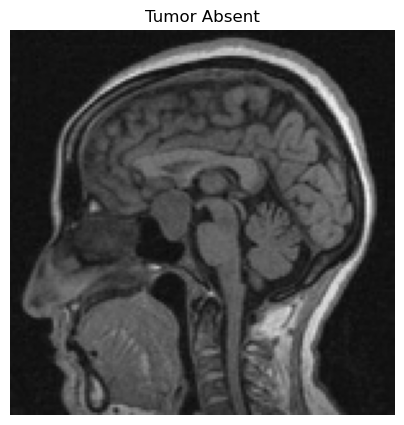

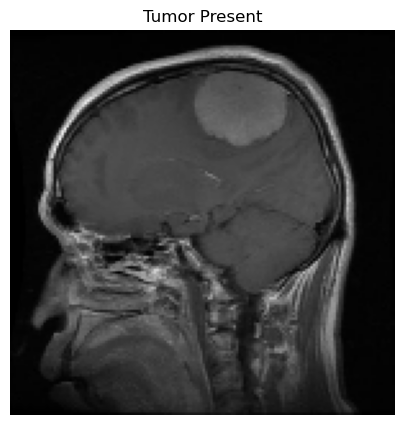

In [196]:
labels = ['Tumor Absent', 'Tumor Present']
# plot image data from first [1] train image data (tumor-free brain)
plt.figure(figsize=(5,5))
plt.imshow(unique_train_img[100][0], cmap='gray')
plt.title(labels[unique_train_img[100][1]])
plt.axis('off')

# plot image data from last [-1] train image data (tumor patient brain)
plt.figure(figsize=(5,5))
plt.imshow(unique_train_img[-22][0], cmap='gray')
plt.title(labels[unique_train_img[-22][1]])
plt.axis('off')

In [38]:
# separate image data and identifiers
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for data, label, _ in unique_train_img:
    x_train.append(data)
    y_train.append(label)
    
for data, label, _ in unique_val_img:
    x_val.append(data)
    y_val.append(label)
    
for data, label, _ in unique_test_img:
    x_test.append(data)
    y_test.append(label)

In [39]:
# scale data and convert to np.array for efficiency

x_train = np.array(x_train)/255

x_test = np.array(x_test)/255

x_val = np.array(x_val)/255

In [40]:
img_size = 150
# resize data for deep learning
x_train = x_train.reshape(-1, img_size, img_size, 3)

x_test = x_test.reshape(-1, img_size, img_size, 3)

x_val = x_val.reshape(-1, img_size, img_size, 3)

# DATAGEN

Alter data to make model more robust

In [41]:
from keras.preprocessing.image import ImageDataGenerator

In [42]:
datagen = ImageDataGenerator(\
                            featurewise_center=False,
                            samplewise_center=False,
                            featurewise_std_normalization=False,
                            samplewise_std_normalization=False, 
                            zca_whitening=False, 
                            rotation_range=30,
                            zoom_range=0.25,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            horizontal_flip=True,
                            vertical_flip=False)

# FSM

In [43]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

In [44]:
metrics = ['Recall', 'accuracy']
fsm = Sequential()
fsm.add(Conv2D(32, (3,3), strides=1, padding='same', activation='relu', input_shape=(150,150,3)))
fsm.add(Flatten())
fsm.add(Dense(units=1, activation='sigmoid'))
fsm.compile(optimizer='adam', loss='binary_crossentropy', metrics=metrics)
fsm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
flatten (Flatten)            (None, 720000)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 720001    
Total params: 720,897
Trainable params: 720,897
Non-trainable params: 0
_________________________________________________________________


In [45]:
from keras.callbacks import ReduceLROnPlateau

In [46]:
learning_rate_reduction_loss = ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.3, min_lr=10**-9)
learning_rate_reduction_acc = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.3, min_lr=10**-9)

# Run Model

In [47]:
epochs = 12
fsm_history = fsm.fit(datagen.flow(x_train, y_train), epochs=epochs, validation_data=datagen.flow(x_val, y_val), callbacks=[learning_rate_reduction_loss, learning_rate_reduction_acc])

Epoch 1/12
80/80 [==============================] - 20s 248ms/step - loss: 0.5900 - recall: 0.9753 - accuracy: 0.8445 - val_loss: 0.5352 - val_recall: 1.0000 - val_accuracy: 0.8343
Epoch 2/12
80/80 [==============================] - 18s 227ms/step - loss: 0.3617 - recall: 0.9881 - accuracy: 0.8642 - val_loss: 0.4196 - val_recall: 0.9726 - val_accuracy: 0.8286
Epoch 3/12
80/80 [==============================] - 18s 226ms/step - loss: 0.3338 - recall: 0.9739 - accuracy: 0.8685 - val_loss: 0.3855 - val_recall: 0.9658 - val_accuracy: 0.8457
Epoch 4/12
80/80 [==============================] - 19s 242ms/step - loss: 0.3186 - recall: 0.9675 - accuracy: 0.8681 - val_loss: 0.3654 - val_recall: 0.9589 - val_accuracy: 0.8400
Epoch 5/12
80/80 [==============================] - ETA: 0s - loss: 0.3187 - recall: 0.9670 - accuracy: 0.8693
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
80/80 [==============================] - 19s 233ms/step - loss: 0.3187 - recall: 0.96

In [48]:
y_test = np.array(y_test, dtype=np.uint8)

In [49]:
fsm.evaluate(x_test, y_test)

16/16 [==============================] - 1s 47ms/step - loss: 0.3200 - recall: 0.9417 - accuracy: 0.8824


[0.3199758231639862, 0.941724956035614, 0.8823529481887817]

In [50]:
# model.predict_classes(x_test)
(fsm.predict(x_test) > 0.5).astype('int32')[:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [51]:
len(y_test)

510

In [52]:
len(y_val)

175

# 2ndSM

In [53]:
metrics = ['Recall', 'accuracy']
ssm = Sequential()
ssm.add(Conv2D(64, (4,4), strides=1, padding='same', activation='relu', input_shape=(150,150,3)))
ssm.add(MaxPool2D((4,4), strides=2, padding='same'))
ssm.add(Dropout(0.1))

ssm.add(Conv2D(64, (3,3), strides=1, padding='same', activation='selu'))
ssm.add(MaxPool2D((3,3), strides=2, padding='same'))
ssm.add(Dropout(0.1))

ssm.add(Conv2D(64, (2,2), strides=1, padding='same', activation='elu'))
ssm.add(MaxPool2D((2,2), strides=1, padding='same'))

ssm.add(Dropout(0.2))
ssm.add(Dense(units=1, activation='relu'))

ssm.add(Flatten())

ssm.add(Dense(units=1, activation='sigmoid'))
ssm.compile(optimizer='adam', loss='binary_crossentropy', metrics=metrics)
ssm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 64)      3136      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 38, 38, 64)       

In [54]:
epochs = 12
ssm_history = ssm.fit(datagen.flow(x_train, y_train), epochs=epochs, validation_data=datagen.flow(x_val, y_val))#, callbacks=[learning_rate_reduction_loss, learning_rate_reduction_acc])

Epoch 1/12
80/80 [==============================] - 87s 1s/step - loss: 0.4607 - recall: 0.9950 - accuracy: 0.8559 - val_loss: 0.4511 - val_recall: 1.0000 - val_accuracy: 0.8343
Epoch 2/12
80/80 [==============================] - 85s 1s/step - loss: 0.3899 - recall: 1.0000 - accuracy: 0.8591 - val_loss: 0.4358 - val_recall: 1.0000 - val_accuracy: 0.8343
Epoch 3/12
80/80 [==============================] - 86s 1s/step - loss: 0.3777 - recall: 0.9995 - accuracy: 0.8591 - val_loss: 0.4272 - val_recall: 1.0000 - val_accuracy: 0.8343
Epoch 4/12
80/80 [==============================] - 87s 1s/step - loss: 0.3686 - recall: 0.9977 - accuracy: 0.8594 - val_loss: 0.4147 - val_recall: 0.9863 - val_accuracy: 0.8286
Epoch 5/12
80/80 [==============================] - 86s 1s/step - loss: 0.3514 - recall: 0.9895 - accuracy: 0.8547 - val_loss: 0.4535 - val_recall: 1.0000 - val_accuracy: 0.8343
Epoch 6/12
80/80 [==============================] - 85s 1s/step - loss: 0.3424 - recall: 0.9734 - accuracy: 0.

# 3rd Model

In [55]:
model3= Sequential()
model3.add(Conv2D(32, (3,3), strides =1, padding = 'same', activation ='relu', input_shape = (150,150,3)))

model3.add(MaxPool2D((2,2), strides=2, padding='same'))
model3.add(Conv2D(64, (3,3), strides =1, padding ='same', activation='relu'))
model3.add(Dropout(0.2))
model3.add(MaxPool2D((2,2), strides=2, padding='same'))
model3.add(MaxPool2D((2,2), strides=2, padding='same'))
model3.add(Conv2D(64, (3,3), strides =1, padding ='same', activation='relu'))
model3.add(Dropout(0.2))

model3.add(Flatten())

model3.add(Dense(units=128, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(units=1, activation='sigmoid'))
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=metrics)
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout_3 (Dropout)          (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 19, 19, 64)       

In [56]:
epochs = 12
model3_history = model3.fit(datagen.flow(x_train, y_train), epochs=epochs, validation_data=datagen.flow(x_val, y_val), callbacks=[learning_rate_reduction_loss, learning_rate_reduction_acc])

Epoch 1/12
80/80 [==============================] - 49s 615ms/step - loss: 0.4637 - recall: 0.9959 - accuracy: 0.8563 - val_loss: 0.4414 - val_recall: 1.0000 - val_accuracy: 0.8343
Epoch 2/12
80/80 [==============================] - 49s 613ms/step - loss: 0.3863 - recall: 0.9954 - accuracy: 0.8559 - val_loss: 0.4052 - val_recall: 0.9932 - val_accuracy: 0.8400
Epoch 3/12
80/80 [==============================] - 48s 605ms/step - loss: 0.3437 - recall: 0.9780 - accuracy: 0.8598 - val_loss: 0.3747 - val_recall: 0.9863 - val_accuracy: 0.8457
Epoch 4/12
80/80 [==============================] - 49s 609ms/step - loss: 0.2989 - recall: 0.9711 - accuracy: 0.8634 - val_loss: 0.3726 - val_recall: 0.9521 - val_accuracy: 0.8286
Epoch 5/12
80/80 [==============================] - ETA: 0s - loss: 0.2854 - recall: 0.9638 - accuracy: 0.8720
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
80/80 [==============================] - 51s 635ms/step - loss: 0.2854 - recall: 0.96

# 4th Model

In [57]:
metrics = ['Recall', 'accuracy']

model4= Sequential()
model4.add(Conv2D(32, (3,3), strides =1, padding = 'same', activation ='relu', input_shape = (150,150,3)))

model4.add(MaxPool2D((2,2), strides=2, padding='same'))
model4.add(Conv2D(64, (3,3), strides =1, padding ='same', activation='relu'))
model4.add(Dropout(0.3))
model4.add(MaxPool2D((2,2), strides=2, padding='same'))
model4.add(Conv2D(64, (3,3), strides =1, padding ='same', activation='relu'))
model4.add(Dropout(0.2))
model4.add(MaxPool2D((2,2), strides=2, padding='same'))
model4.add(Conv2D(64, (3,3), strides =1, padding ='same', activation='relu'))
model4.add(Dropout(0.15))

model4.add(Flatten())

model4.add(Dense(units=128, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(units=1, activation='sigmoid'))
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=metrics)
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 38, 38, 64)        36928     
_________________________________________________________________
dropout_7 (Dropout)          (None, 38, 38, 64)       

In [58]:
epochs = 12
model4_history = model4.fit(datagen.flow(x_train, y_train), epochs=epochs, validation_data=datagen.flow(x_val, y_val), callbacks=[learning_rate_reduction_loss, learning_rate_reduction_acc])

Epoch 1/12
80/80 [==============================] - 77s 958ms/step - loss: 0.4622 - recall: 0.9867 - accuracy: 0.8496 - val_loss: 0.5733 - val_recall: 0.9658 - val_accuracy: 0.8457
Epoch 2/12
80/80 [==============================] - 74s 930ms/step - loss: 0.3727 - recall: 0.9881 - accuracy: 0.8543 - val_loss: 0.4415 - val_recall: 1.0000 - val_accuracy: 0.8343
Epoch 3/12
80/80 [==============================] - ETA: 0s - loss: 0.3622 - recall: 0.9876 - accuracy: 0.8555
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
80/80 [==============================] - 70s 873ms/step - loss: 0.3622 - recall: 0.9876 - accuracy: 0.8555 - val_loss: 0.3959 - val_recall: 1.0000 - val_accuracy: 0.8343
Epoch 4/12
80/80 [==============================] - 71s 890ms/step - loss: 0.2829 - recall: 0.9771 - accuracy: 0.8748 - val_loss: 0.3469 - val_recall: 0.9452 - val_accuracy: 0.8171
Epoch 5/12
80/80 [==============================] - 70s 875ms/step - loss: 0.2689 - recall: 0.95

# 5th Model

In [59]:
metrics = ['Recall', 'accuracy']

model5= Sequential()
model5.add(Conv2D(32, (3,3), strides =1, padding = 'same', activation ='relu', input_shape = (150,150,3)))

model5.add(MaxPool2D((2,2), strides=2, padding='same'))
model5.add(Conv2D(64, (2,2), strides =1, padding ='same', activation='relu'))
model5.add(Dropout(0.15))
model5.add(MaxPool2D((2,2), strides=2, padding='same'))
model5.add(Conv2D(64, (3,3), strides =1, padding ='same', activation='relu'))
model5.add(Dropout(0.2))
model5.add(MaxPool2D((2,2), strides=2, padding='same'))
model5.add(Conv2D(64, (3,3), strides =1, padding ='same', activation='selu'))


model5.add(Flatten())

model5.add(Dense(units=128, activation='relu'))
model5.add(Dropout(0.1))
model5.add(Dense(units=1, activation='sigmoid'))
model5.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=metrics)
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 75, 75, 64)        8256      
_________________________________________________________________
dropout_10 (Dropout)         (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 38, 38, 64)        36928     
_________________________________________________________________
dropout_11 (Dropout)         (None, 38, 38, 64)       

In [60]:
epochs = 12
model5_history = model5.fit(datagen.flow(x_train, y_train), epochs=epochs, validation_data=datagen.flow(x_val, y_val), callbacks=[learning_rate_reduction_loss, learning_rate_reduction_acc])

Epoch 1/12
80/80 [==============================] - 66s 828ms/step - loss: 0.7807 - recall: 0.9853 - accuracy: 0.8488 - val_loss: 0.4480 - val_recall: 1.0000 - val_accuracy: 0.8343
Epoch 2/12
80/80 [==============================] - 68s 855ms/step - loss: 0.5135 - recall: 0.9817 - accuracy: 0.8480 - val_loss: 0.4117 - val_recall: 1.0000 - val_accuracy: 0.8400
Epoch 3/12
80/80 [==============================] - 71s 885ms/step - loss: 0.3843 - recall: 0.9812 - accuracy: 0.8555 - val_loss: 0.4088 - val_recall: 1.0000 - val_accuracy: 0.8400
Epoch 4/12
80/80 [==============================] - ETA: 0s - loss: 0.3631 - recall: 0.9757 - accuracy: 0.8524
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
80/80 [==============================] - 64s 799ms/step - loss: 0.3631 - recall: 0.9757 - accuracy: 0.8524 - val_loss: 0.4040 - val_recall: 1.0000 - val_accuracy: 0.8400
Epoch 5/12
80/80 [==============================] - 72s 898ms/step - loss: 0.2824 - recall: 0.97

# 6th Model

In [61]:
metrics = ['Recall', 'accuracy']

model6= Sequential()
model6.add(Conv2D(32, (3,3), strides =1, padding = 'same', activation ='selu', input_shape = (150,150,3)))

# model6.add(MaxPool2D((2,2), strides=2, padding='same'))
# model6.add(Conv2D(64, (2,2), strides =1, padding ='same', activation='selu'))
# model6.add(Dropout(0.15))
model6.add(MaxPool2D((2,2), strides=2, padding='same'))
model6.add(Conv2D(64, (3,3), strides =1, padding ='same', activation='selu'))
model6.add(Dropout(0.2))
model6.add(MaxPool2D((2,2), strides=2, padding='same'))
model6.add(Conv2D(64, (3,3), strides =1, padding ='same', activation='selu'))
model6.add(Dropout(0.2))

model6.add(Flatten())

model6.add(Dense(units=128, activation='relu'))
model6.add(Dropout(0.2))
model6.add(Dense(units=1, activation='sigmoid'))
model6.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=metrics)
model6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout_13 (Dropout)         (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 38, 38, 64)        36928     
_________________________________________________________________
dropout_14 (Dropout)         (None, 38, 38, 64)       

In [62]:
epochs = 12
model6_history = model6.fit(datagen.flow(x_train, y_train), epochs=epochs, validation_data=datagen.flow(x_val, y_val), callbacks=[learning_rate_reduction_loss, learning_rate_reduction_acc])

Epoch 1/12
80/80 [==============================] - 79s 985ms/step - loss: 2.6675 - recall: 0.9606 - accuracy: 0.8303 - val_loss: 0.4797 - val_recall: 1.0000 - val_accuracy: 0.8343
Epoch 2/12
80/80 [==============================] - 84s 1s/step - loss: 1.5320 - recall: 0.9757 - accuracy: 0.8413 - val_loss: 0.4690 - val_recall: 1.0000 - val_accuracy: 0.8343
Epoch 3/12
80/80 [==============================] - ETA: 0s - loss: 0.4829 - recall: 0.9940 - accuracy: 0.8547
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
80/80 [==============================] - 85s 1s/step - loss: 0.4829 - recall: 0.9940 - accuracy: 0.8547 - val_loss: 0.4454 - val_recall: 1.0000 - val_accuracy: 0.8343
Epoch 4/12
80/80 [==============================] - 84s 1s/step - loss: 0.4245 - recall: 0.9982 - accuracy: 0.8575 - val_loss: 0.4413 - val_recall: 1.0000 - val_accuracy: 0.8343
Epoch 5/12
80/80 [==============================] - ETA: 0s - loss: 0.4982 - recall: 0.9950 - accuracy: 0

In [63]:
metrics = ['Recall', 'accuracy']

model7= Sequential()
model7.add(Conv2D(32, (2,2), strides =2, padding = 'same', activation ='selu', input_shape = (150,150,3)))


model7.add(MaxPool2D((2,2), strides=2, padding='same'))
model7.add(Conv2D(64, (3,3), strides =1, padding ='same', activation='selu'))
model7.add(Dropout(0.1))
model7.add(MaxPool2D((2,2), strides=2, padding='same'))
model7.add(Conv2D(64, (3,3), strides =1, padding ='same', activation='selu'))

model7.add(Flatten())

model7.add(Dense(units=128, activation='relu'))
model7.add(Dropout(0.2))
model7.add(Dense(units=1, activation='sigmoid'))
model7.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=metrics)
model7.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 75, 75, 32)        416       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 38, 38, 64)        18496     
_________________________________________________________________
dropout_16 (Dropout)         (None, 38, 38, 64)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 19, 19, 64)        36928     
_________________________________________________________________
flatten_6 (Flatten)          (None, 23104)            

In [64]:
epochs = 12
model7_history = model7.fit(datagen.flow(x_train, y_train), epochs=epochs, validation_data=datagen.flow(x_val, y_val), callbacks=[learning_rate_reduction_loss, learning_rate_reduction_acc])

Epoch 1/12
80/80 [==============================] - 26s 327ms/step - loss: 1.7183 - recall: 0.9615 - accuracy: 0.8311 - val_loss: 0.5016 - val_recall: 1.0000 - val_accuracy: 0.8343
Epoch 2/12
80/80 [==============================] - 26s 324ms/step - loss: 0.4841 - recall: 0.9895 - accuracy: 0.8535 - val_loss: 0.4435 - val_recall: 1.0000 - val_accuracy: 0.8343
Epoch 3/12
80/80 [==============================] - ETA: 0s - loss: 0.4686 - recall: 0.9771 - accuracy: 0.8429
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
80/80 [==============================] - 26s 325ms/step - loss: 0.4686 - recall: 0.9771 - accuracy: 0.8429 - val_loss: 0.4603 - val_recall: 1.0000 - val_accuracy: 0.8343
Epoch 4/12
80/80 [==============================] - 26s 326ms/step - loss: 0.3656 - recall: 1.0000 - accuracy: 0.8591 - val_loss: 0.4378 - val_recall: 1.0000 - val_accuracy: 0.8343
Epoch 5/12
80/80 [==============================] - 29s 365ms/step - loss: 0.3624 - recall: 0.99

## visualize performance

In [65]:
from sklearn.metrics import classification_report, confusion_matrix

In [66]:
import seaborn as sns

In [67]:
n_epochs = len(model5_history.history['loss'])
n_epochs

12

In [159]:
def plot_metrics(model_history, filename='default', path=None):
    '''
    Plots model performance over epochs and saves as .png
    
    Parameters:
        model_history (dict): history of a model
        *kwargs
        is_dict (bool): specify if file is dict type
        filename (string): appends file with name 'default' unless specified or path kwarg specified. Set to None to prevent file from saving
        path (string): full path to save file. File type may be specified
        
    '''
    # get history from callback if dict not specified
    try:
        model_history = dict(model_history)
        
    except:
        model_history = model_history.history
        
    # get epochs from history from model
    n_epochs = len(model_history['loss'])
    epochs = [i for i in range(n_epochs)]
    
    # plt.rcParams.update(plt.rcParamsDefault)
    plt.style.use('fivethirtyeight')
    plt.rcParams['text.color'] = 'k'
    plt.rcParams['axes.facecolor'] = 'F0F0F0'

    fig , ax = plt.subplots(1,2)
    train_acc = model_history['accuracy']
    train_loss = model_history['loss']
    val_acc = model_history['val_accuracy']
    val_loss = model_history['val_loss']
      
    
    fig.set_size_inches(20,10)

    ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
    ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
    ax[0].set_title('Training & Validation Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")
    ax[0].spines['bottom'].set_color('black')
    ax[0].spines['left'].set_color('black')
    ax[0].tick_params(axis='x', colors='black')
    ax[0].tick_params(axis='y', colors='black')
    ax[0].yaxis.label.set_color('black')
    ax[0].xaxis.label.set_color('black')

    ax[1].plot(epochs , train_loss , 'g-o' , label = 'Testing Loss')
    ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
    ax[1].set_title('Testing Accuracy & Loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Testing & Validation Loss")
    ax[1].spines['bottom'].set_color('black')
    ax[1].spines['left'].set_color('black')
    ax[1].tick_params(axis='x', colors='black')
    ax[1].tick_params(axis='y', colors='black')
    ax[1].yaxis.label.set_color('black')
    ax[1].xaxis.label.set_color('black')
    
    if path:
        plt.savefig(f'{path}', transparent=True)
    
    elif filename:
        plt.savefig(f'figures/plot_metrics_{filename}', transparent=True)
        
    plt.show()


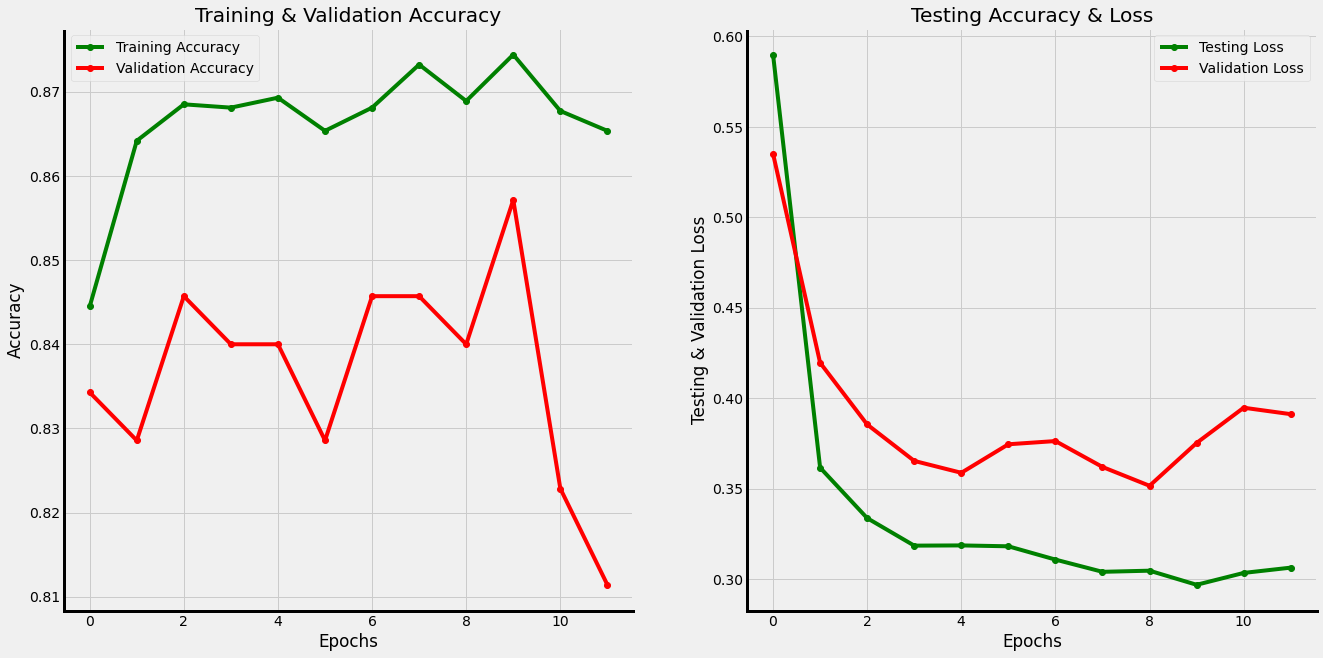

Took 0.7270617485046387 seconds


In [160]:
start = time.time()
plot_metrics(fsm_history.history, filename='FSM')
stop = time.time()
print(f'Took {stop-start} seconds')

In [76]:
# define funciton to plot confusion matrix
def plot_confusion_matrix(model, X, Y, labels=['No Tumor', 'Tumor'], filename='default', path=None):
    '''
    Creates classification report, plots, and saves confusion matrix using the existing model (model), 
        test data (X_test), and test classifications (Y_test).
        
    Parameters: 
        model (keras model): trained model used to make predictions of data
        X (np.array): image data used to make model predictions
        Y (np.array): image classifications/ target (int) used to determine accuracy of predictions
        *kwargs
        labels (list): xlabels and ylabels for plot of confusion matrix, and target_names used in classification report
        filename (string): appends file with name 'default' unless specified or path kwarg specified. Set to None to prevent file from saving
        path (string): full path to save file. File type may be specified
    '''
    
    # get predictions
    predictions = (model.predict(X) > 0.5).astype('int32')
    print(classification_report(Y, predictions, target_names=labels))
    
    #create confusion matrix
    cm = confusion_matrix(Y, predictions)
    print(cm)
    
    cm = np.array(cm)
    
    # plot confusion matrix
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, cmap='Greys', linecolor='grey', linewidth=1, annot=True, fmt='', xticklabels=labels, yticklabels=labels)
    
    plt.xlabel('Predicted Class')    
    plt.ylabel('Image Class')
    
    if path:
        plt.savefig(f'{path}', transparent=True)
    
    elif filename:
        plt.savefig(f'figures/plot_confusion_matrix_{filename}', transparent=True)
        
    plt.show()

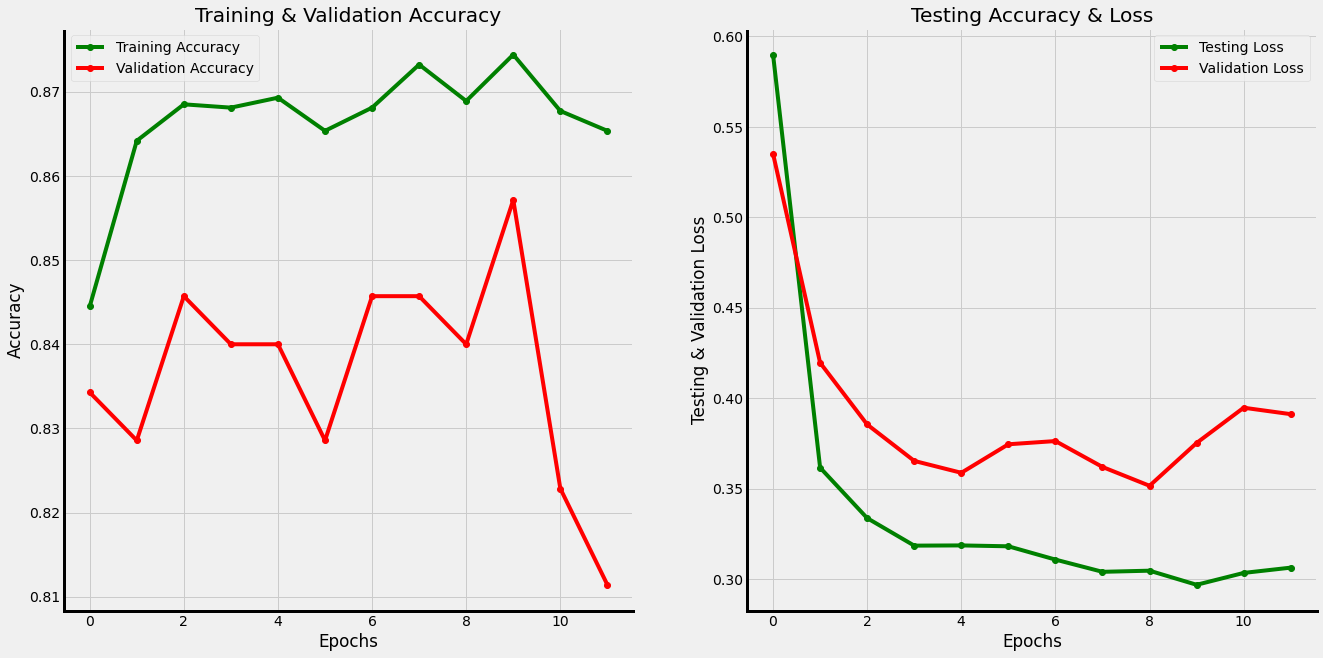

In [74]:
plot_metrics(fsm_history.history, filename='FSM')

              precision    recall  f1-score   support

    No Tumor       0.65      0.57      0.61        81
       Tumor       0.92      0.94      0.93       429

    accuracy                           0.88       510
   macro avg       0.78      0.75      0.77       510
weighted avg       0.88      0.88      0.88       510

[[ 46  35]
 [ 25 404]]


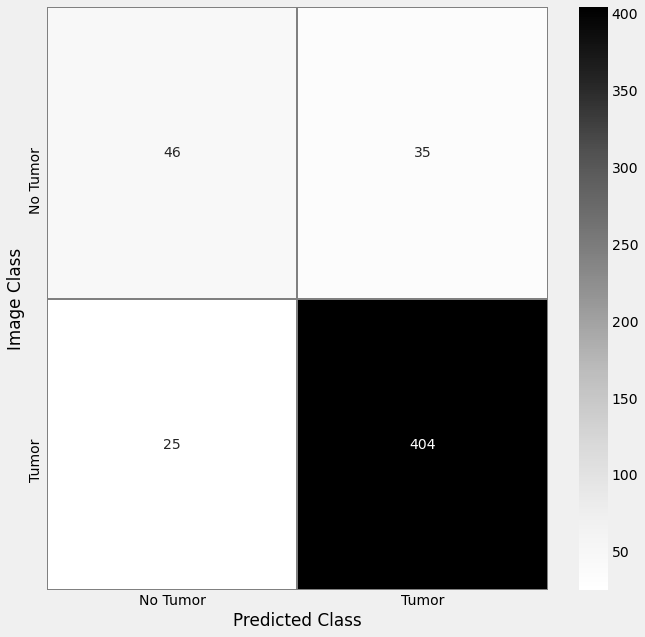

In [77]:
plot_confusion_matrix(fsm, x_test, y_test, filename='FSM')

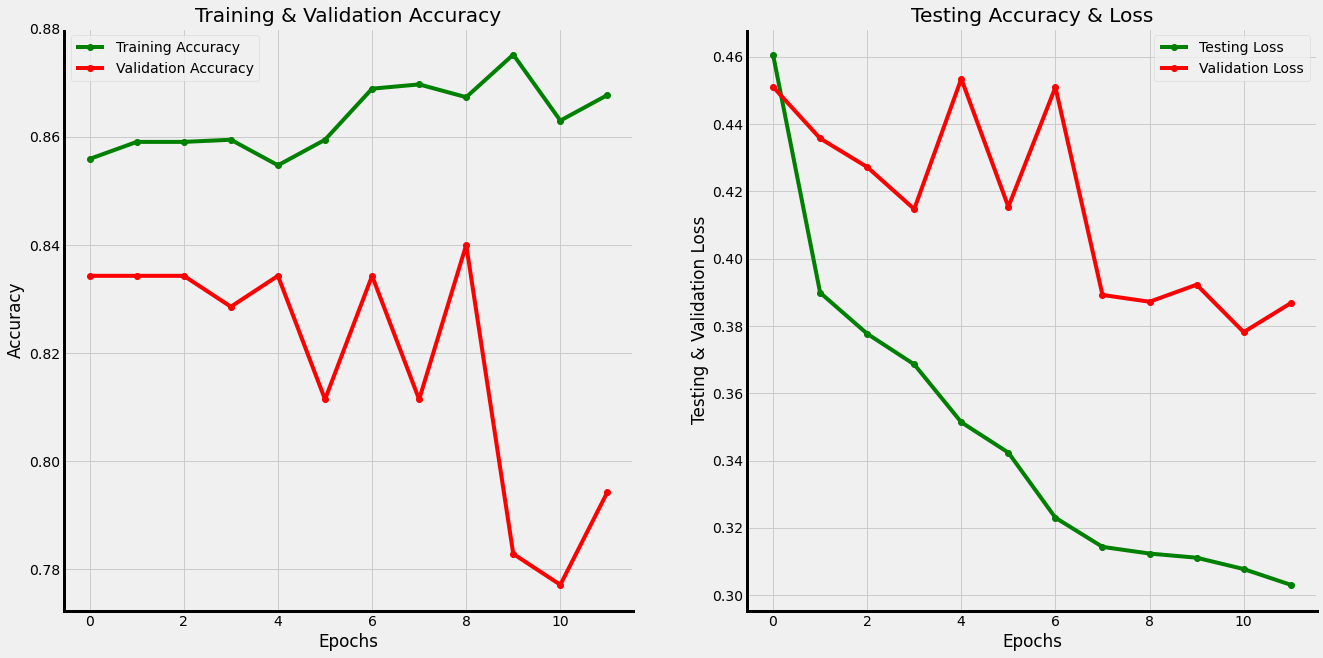

              precision    recall  f1-score   support

    No Tumor       0.62      0.30      0.40        81
       Tumor       0.88      0.97      0.92       429

    accuracy                           0.86       510
   macro avg       0.75      0.63      0.66       510
weighted avg       0.84      0.86      0.84       510

[[ 24  57]
 [ 15 414]]


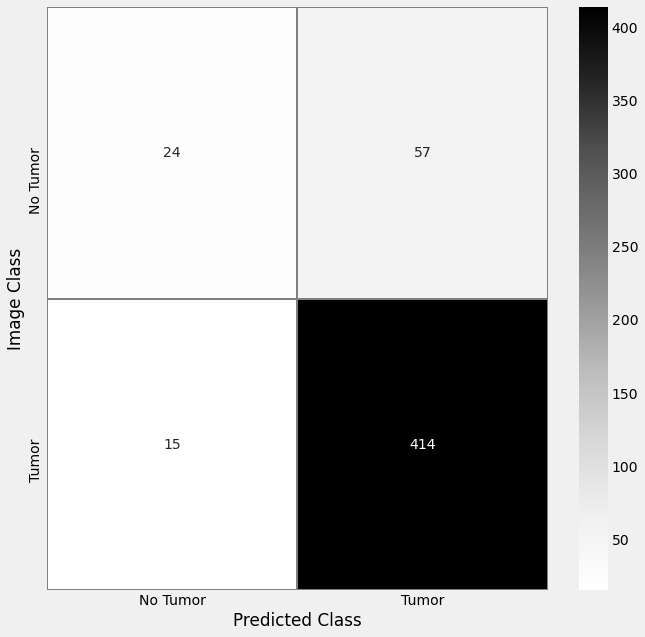

In [180]:
plot_metrics(ssm_history.history, filename='model_2')
plot_confusion_matrix(ssm, x_test, y_test, filename='model_2')

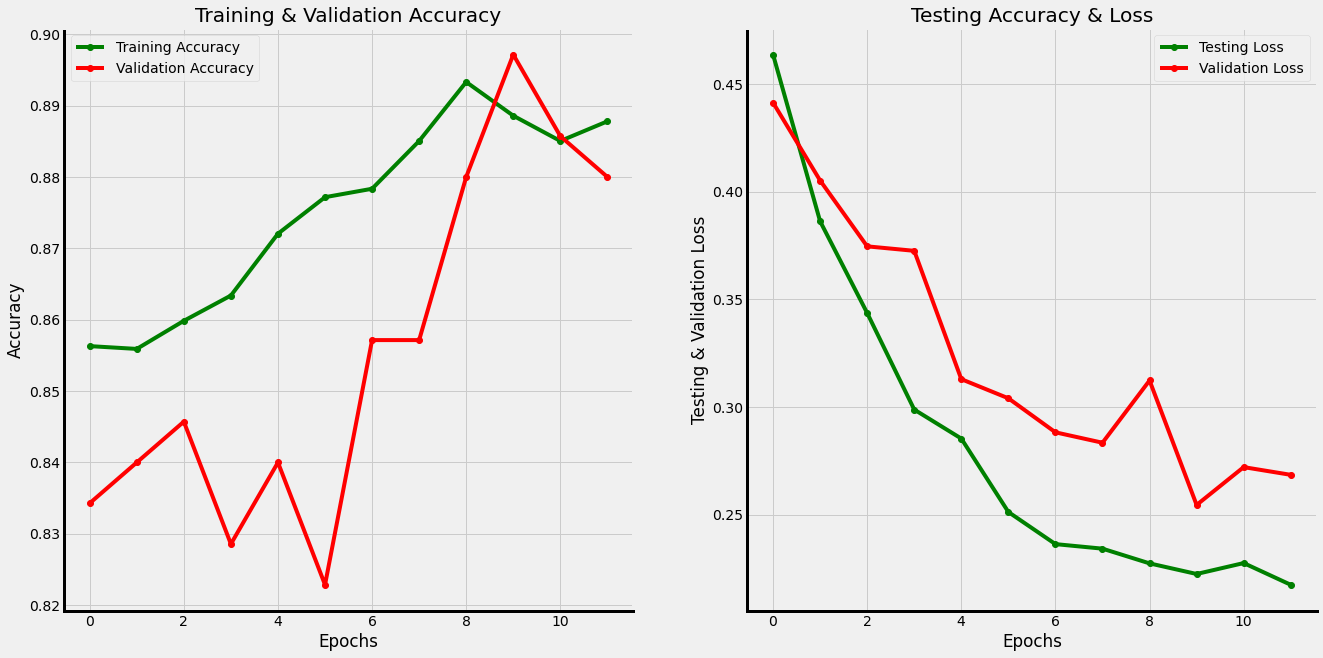

              precision    recall  f1-score   support

    No Tumor       0.63      0.73      0.68        81
       Tumor       0.95      0.92      0.93       429

    accuracy                           0.89       510
   macro avg       0.79      0.82      0.81       510
weighted avg       0.90      0.89      0.89       510

[[ 59  22]
 [ 34 395]]


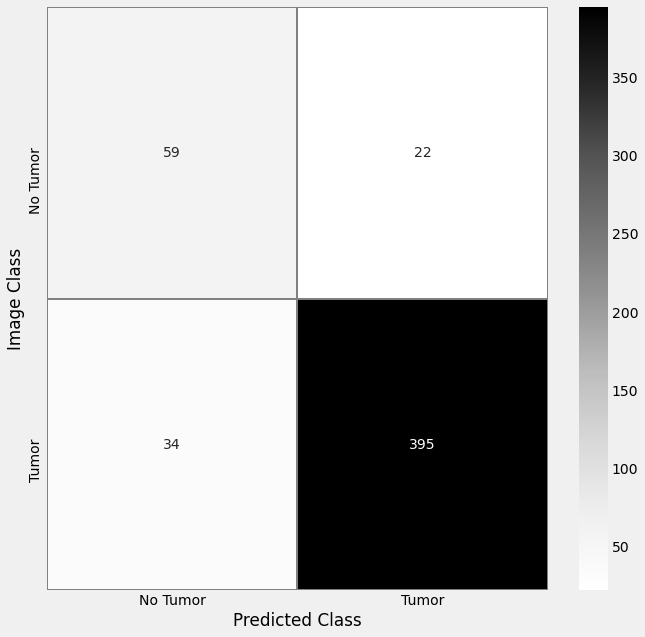

In [181]:
plot_metrics(model3_history.history, filename='model_3')
plot_confusion_matrix(model3, x_test, y_test, filename='model_3')

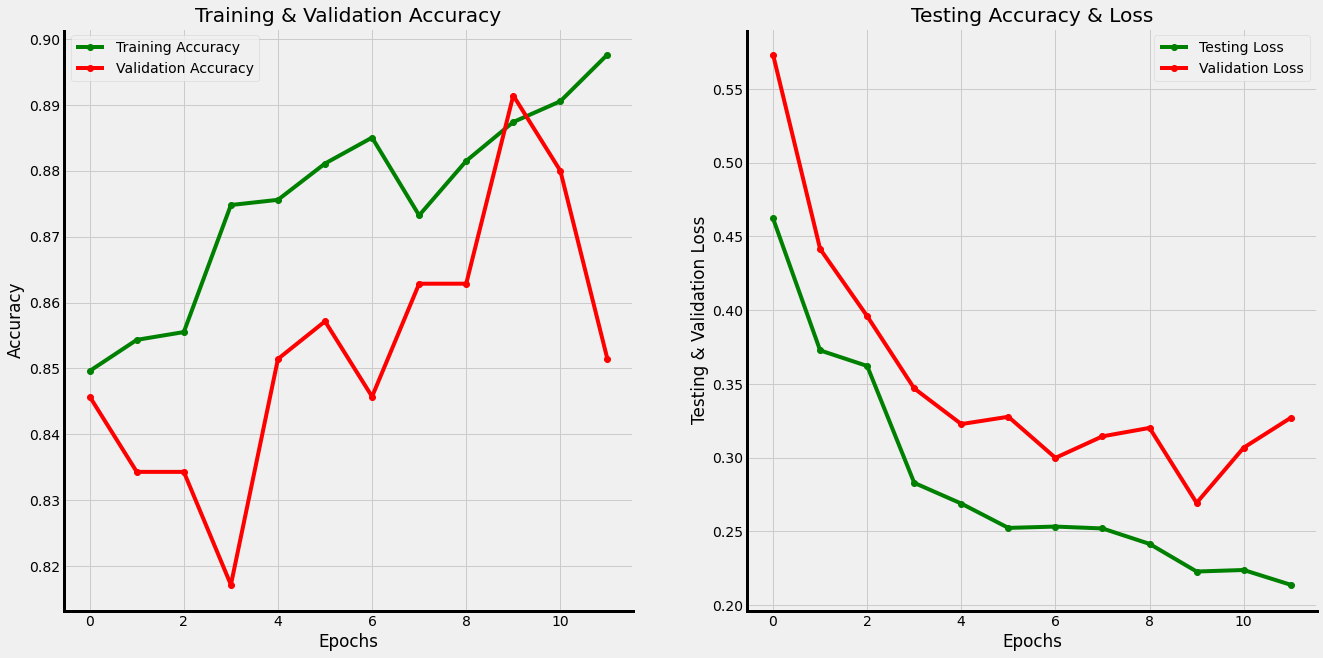

              precision    recall  f1-score   support

    No Tumor       0.53      0.79      0.64        81
       Tumor       0.96      0.87      0.91       429

    accuracy                           0.86       510
   macro avg       0.74      0.83      0.77       510
weighted avg       0.89      0.86      0.87       510

[[ 64  17]
 [ 56 373]]


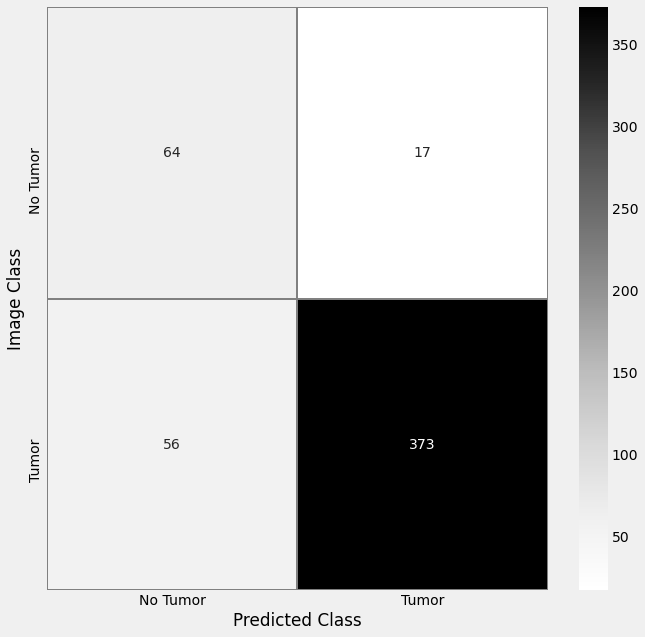

In [182]:
plot_metrics(model4_history.history, filename='model_4')
plot_confusion_matrix(model4, x_test, y_test, filename='model_4')

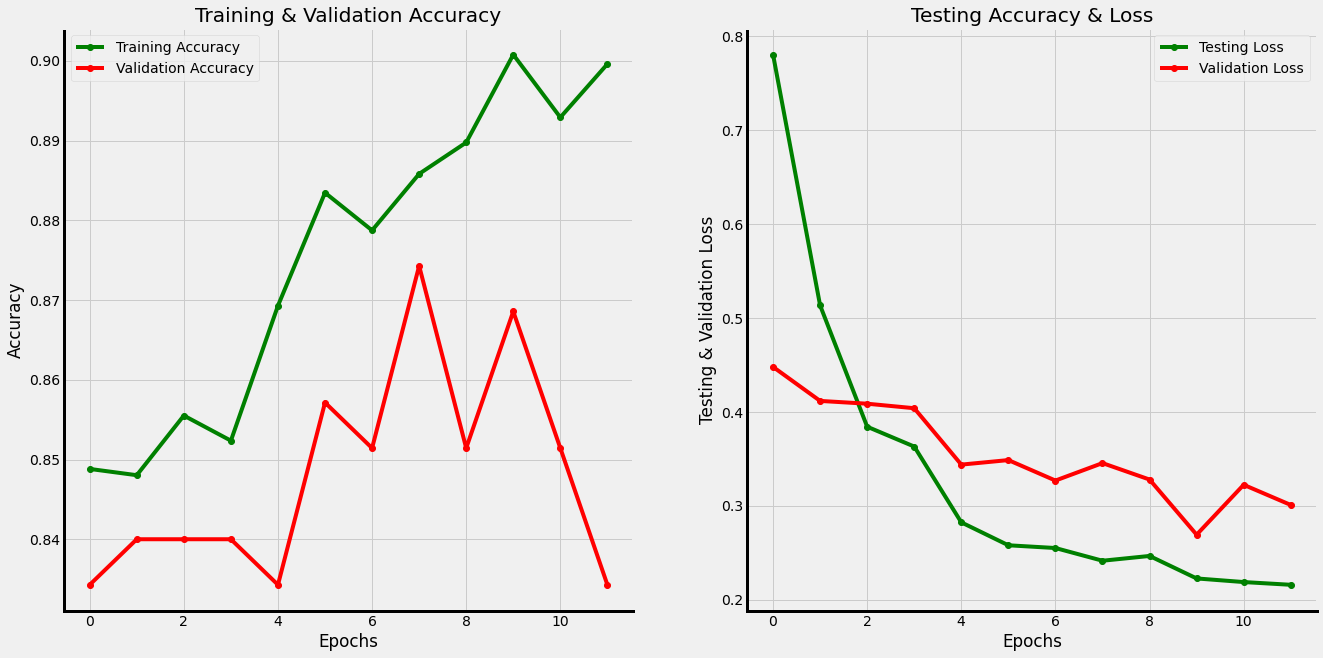

              precision    recall  f1-score   support

    No Tumor       0.68      0.52      0.59        81
       Tumor       0.91      0.95      0.93       429

    accuracy                           0.88       510
   macro avg       0.80      0.74      0.76       510
weighted avg       0.88      0.88      0.88       510

[[ 42  39]
 [ 20 409]]


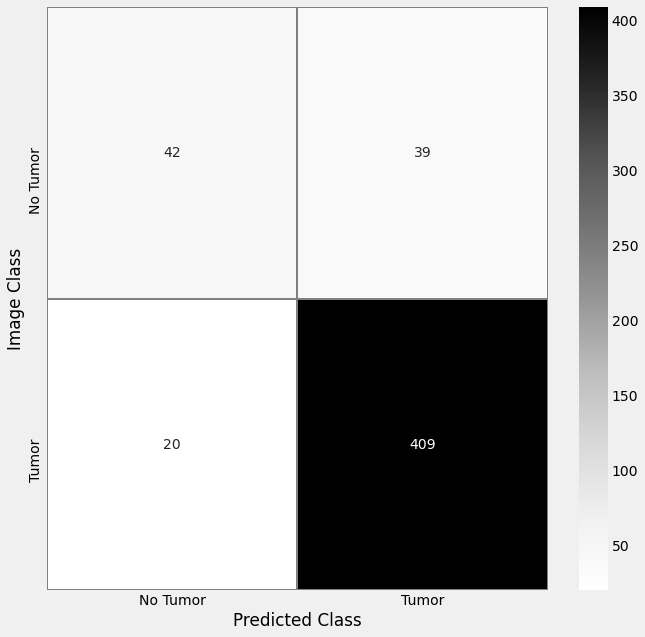

In [183]:
plot_metrics(model5_history.history, filename='model_5')
plot_confusion_matrix(model5, x_test, y_test, filename='model_5')

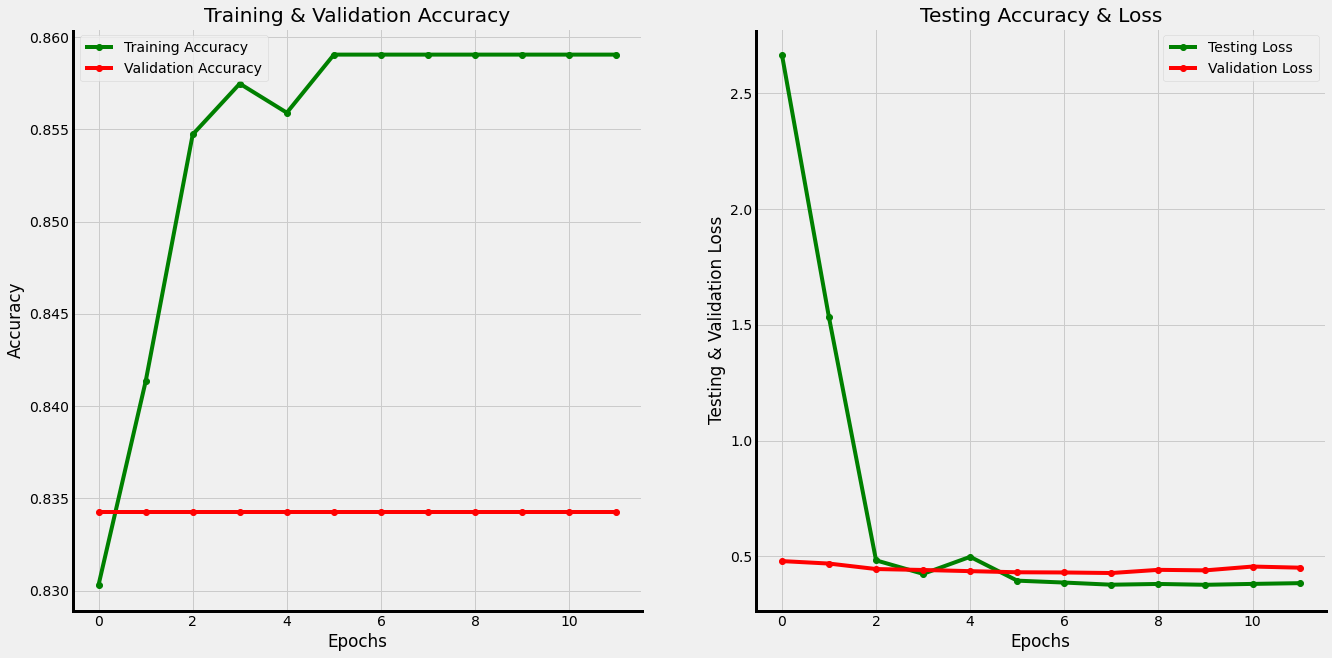

C:\Users\samjd\anaconda3\envs\oy-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    No Tumor       0.00      0.00      0.00        81
       Tumor       0.84      1.00      0.91       429

    accuracy                           0.84       510
   macro avg       0.42      0.50      0.46       510
weighted avg       0.71      0.84      0.77       510

[[  0  81]
 [  0 429]]


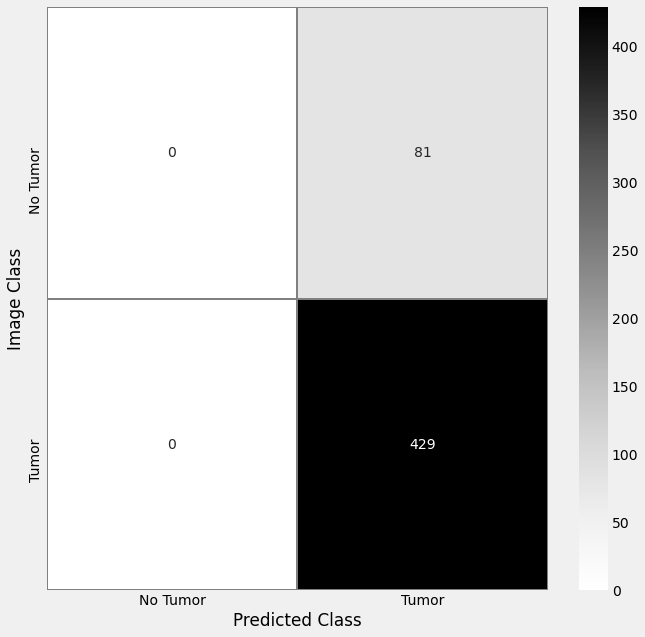

In [184]:
plot_metrics(model6_history.history, filename='model_6')
plot_confusion_matrix(model6, x_test, y_test, filename='model_6')

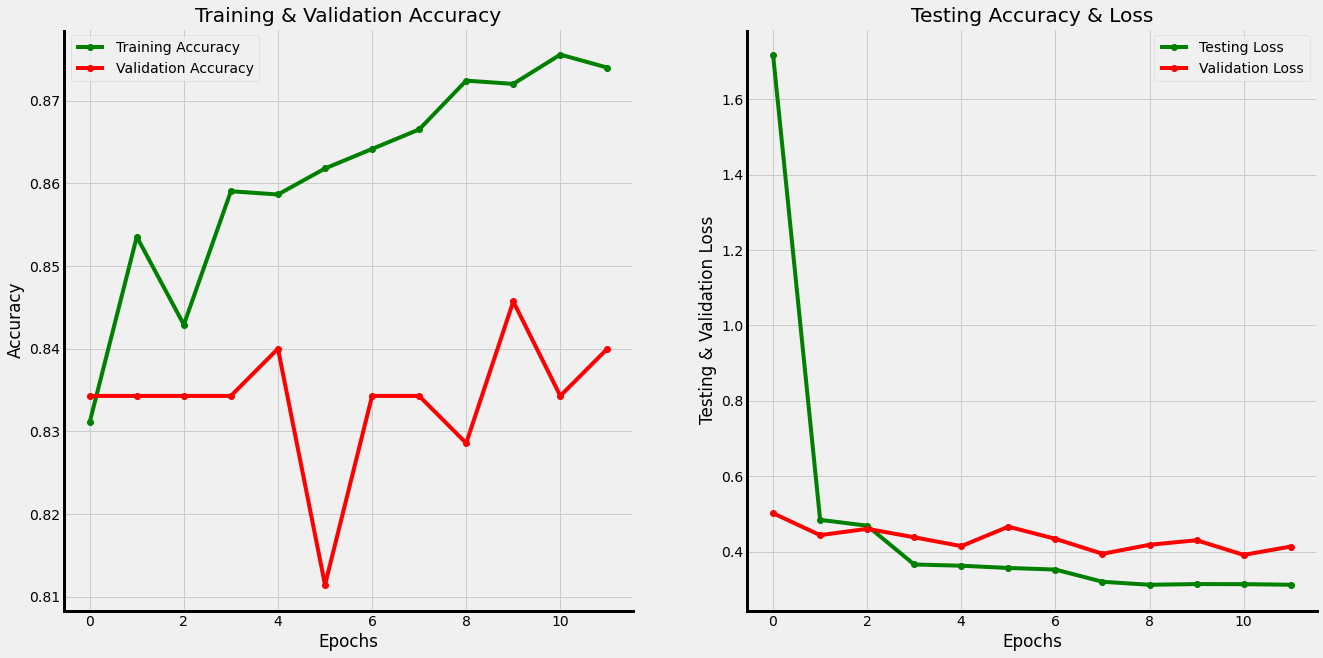

              precision    recall  f1-score   support

    No Tumor       0.72      0.44      0.55        81
       Tumor       0.90      0.97      0.93       429

    accuracy                           0.88       510
   macro avg       0.81      0.71      0.74       510
weighted avg       0.87      0.88      0.87       510

[[ 36  45]
 [ 14 415]]


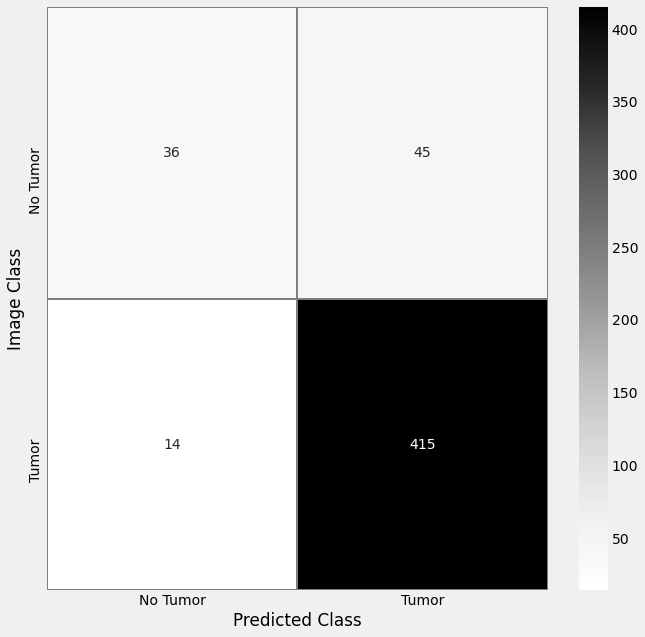

In [185]:
plot_metrics(model7_history.history, filename='model_7')
plot_confusion_matrix(model7, x_test, y_test, filename='model_7')

# Save Models

In [177]:
model_names = ['fsm', 'ssm', 'model3', 'model4', 'model5', 'model6', 'model7']

In [133]:
import pickle
import tensorflow as tf

In [131]:
# save with built in method
model_name = 'fsm'
path = f'saved_models/{model_name}'
fsm.save(path)

INFO:tensorflow:Assets written to: saved_models/fsm\assets


In [132]:
# load
saved_model = tf.keras.models.load_model(path)

In [119]:
saved_preds = (saved_model.predict(x_test) > 0.5).astype('int32')
saved_preds[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [120]:
fsm_preds = (fsm.predict(x_test) > 0.5).astype('int32')
fsm_preds[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [123]:
(fsm_preds == saved_preds).all()

True

In [170]:
# save model history as pickle
with open(path+'history', 'wb') as file:
    pickle.dump(fsm_history.history, file)

In [172]:
# load model history with pickle
with open(path+'history', 'rb') as file:
    model_hist = pickle.load(file)

In [178]:
for name in model_names:
    path = f'saved_models/{name}'
    globals()[name].save(path)

INFO:tensorflow:Assets written to: saved_models/fsm\assets
INFO:tensorflow:Assets written to: saved_models/ssm\assets
INFO:tensorflow:Assets written to: saved_models/model3\assets
INFO:tensorflow:Assets written to: saved_models/model4\assets
INFO:tensorflow:Assets written to: saved_models/model5\assets
INFO:tensorflow:Assets written to: saved_models/model6\assets
INFO:tensorflow:Assets written to: saved_models/model7\assets


In [179]:
for name in model_names:
    name = name + '_history'
    path = f'saved_models/{name}'
    
    with open(path, 'wb') as file:
        pickle.dump(globals()[name].history, file)

# It's TIME for LIME

## implement LIME (and other techniques) to interpret model performance

In [186]:
[i for i in np.linspace(0, 10, num=(11))]

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

In [187]:
[i for i in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [188]:
def fun_sqrt(number):
    n = np.floor(np.sqrt(number))
    n = n*(n+1)
    
    return n

def fun_quad(number):
    n = np.round(np.sqrt(number))
    n = (n-1)*(n+1)
    
    return n

In [189]:
x_max = 1000
x = []
sqrt_list = []
quad_list = []


for i in range(x_max):
    x.append(i)
    sqrt_list.append(fun_sqrt(i))
    quad_list.append(fun_quad(i))


In [190]:
plt.rcParams.update(plt.rcParamsDefault)

"QUAD" FUNCTION: $ceil(\sqrt{n})*floor(\sqrt{n})$ <br>
"SQRT" FUNCTION: $(round(\sqrt{n})+1)*(round(\sqrt{n})-1$

In [ ]:
plt.style.use('dark_background')

figsize = (5, 5)
fig, ax = plt.subplots(figsize=figsize)

ax.plot(x, sqrt_list)
ax.plot(x, quad_list)
ax.legend([r'\u221A', 'quad']);
plt.savefig('figures/fun_with_matplotlib', transparent=True)

In [ ]:
import math 
import lime.lime_image as li
from skimage.segmentation import mark_boundaries

In [ ]:
def lime_image(model, image, min_superpixels=1, max_superpixels=10, positive_only=False, negative_only=False, hide_rest=False,\
                filename='default', path=None, figsize=(15,15), axis='off', suptitle='Different Features Analyzed by Model'):
    '''
    Create a visual of the inner workings of the image processing neural network using LimeImageExplainer from lime.lime_image.
        It does this by separating the image into various regions known as "superpixels" and judging model's performance
        with and without these superpixels on the image.
    
    Parameters:
        model (keras sequantial model): model used in analysis of image
        image (np.array): image to be analyzed
        *kwargs
        min_superpixels (int): minimum number of regions in LIME analysis of model's classification. Default 1
        max_superpixels (int): maxmum number of regions in LIME analysis of model's classification. Default 10
        positive_only (bool): indicate whether to include superpixels correlated to correct classification. Default False
        negative_only (bool): indicate whether to include superpixels correlated to incorrect classification. Default False
        hide_rest (bool): if set to True, hides parts of image not included in superpixels
        filename (string): appends file with name 'default' unless specified or path kwarg specified. Set to None to prevent file from saving
        path (string): full path to save file, file type may be specified. Default None
        figsize (tuple): size of figure to be saved. Default (15, 15)
        axis (string): turn axis off. Default 'off'
        suptitle (string): main title of plot. Default 'Different Features Analyzed by Model'
    '''
    
    # instantiate image explainer
    explainer = li.LimeImageExplainer()
    
    # difference
    diff = max_superpixels - min_superpixels
    
    # calculate shape of figure
    columns = int(np.ceil((diff)**0.5))
    rows = int(np.ceil(diff/columns))
    
    # get grid params
    grid_max = rows*columns
    grid_diff = grid_max - diff
    
    print(f'rows: {rows}  columns: {columns}')
    
    # instantiate plot to populate with explained images
    fig, ax = plt.subplots(rows, columns, figsize=figsize)
    print(f'len(ax) = {len(ax)}')
    ax = ax.flatten()
    m_end = diff // rows
    n_end = diff % (columns)
    print(f'm_end: {m_end}  n_end: {n_end}')
    
    for i in range(diff):
        k = i + min_superpixels
        
        # analyze image and create mask
        explanation = explainer.explain_instance(image, model.predict, top_labels=5, hide_color=0, num_samples=1000)
        temp, mask = explanation.get_image_and_mask(0, num_features=k, positive_only=positive_only, negative_only=negative_only, hide_rest=hide_rest)

        # plot results
        ax[i].imshow(mark_boundaries(temp/2 + 0.5, mask))
        ax[i].axis(axis)
        ax[i].set_title(f'# of Superpixels: {k}')            

    
    if grid_diff:
        for j in range(diff, grid_max):
            ax[j].axis(axis_off)
            
    
    fig.suptitle(suptitle)
    
    if path:
        plt.savefig(f'{path}', transparent=True)
    
    elif filename:
        plt.savefig(f'figures/plot_confusion_matrix_{filename}', transparent=True)
        
    plt.show()

        
# lime_image(fsm, x_train[1006], min_superpixels=2, max_superpixels=5, title='fsm' )

In [ ]:
plt.style.use('dark_background')
plt.imshow(x_train[1006])
plt.grid(None)
plt.axis('off')

plt.savefig('1006', transparent=True, dpi=150)

In [ ]:
lime_image(fsm, x_train[1006], min_superpixels=0, max_superpixels=2, suptitle='lime2' )

In [ ]:
lime_image(fsm, x_train[1006], min_superpixels=0, max_superpixels=9, suptitle='lime3')

In [ ]:
lime_image(fsm, x_train[1007], min_superpixels=0, max_superpixels=3, figsize=(15,10))

# Get paths to additional image files 
## (updated)

In [ ]:
# imports from kaggle example https://www.kaggle.com/kmader/show-3d-nifti-images
# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import os
import skimage
from skimage.morphology import ball, disk, dilation, binary_erosion, remove_small_objects, erosion, closing, reconstruction, binary_closing, binary_dilation, binary_opening
from skimage.measure import label,regionprops, perimeter
from skimage.filters import roberts, sobel
from skimage import measure, feature
from skimage.segmentation import clear_border
from skimage import data
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import scipy.misc
from glob import glob
from skimage.io import imread

# Create .gif from fdata

## Define Functions

### Define function to create list of folder names within a given directory

In [ ]:
def get_dir_folders(directory):
    '''
    Input: list-like directory containing the folder names / file names within a given parent folder
    Returns: list clean_directory containing only folder names within the parent folder
    '''
    # create list copy of directory
    clean_directory = list(directory)
    
    # iterate through directory
    for name in directory:
        
        # remove all names with file extensions
        print('path: ', name)
        
        filename = name.split('/')[-1]
        
        if '.' in filename:
            print(f'remove {name} from list')
            directory.remove(name)
            
    return clean_directory
            
#         # remove all names with file extensions
#         print('path: ', name)
#         print('name[-4]', name[-4])
#         if '.' == name[-4]:
#             print(f'remove {name} from list')
#             clean_directory.remove(name)
            
#         elif '.' in name[-6:]:
#             print(f'remove {name} from list')
#             clean_directory.remove(name)
            
#         elif 'txt' in name:
#             print(f'remove {name} from list')
#             clean_directory.remove(name)
            
#         elif 'tar' in name:
#             print(f'remove {name} from list')
#             clean_directory.remove(name)
            


### Define function to load image file(s) given folder path

In [ ]:
# def get_gz_img_paths(parent_folder, in_name='*'):

#     return glob(os.path.join([folder for folder in image_folder if in_name in folder][0], '*'))


### Define function to create .gif given image data

In [ ]:
# define function to create gif from image data
def create_gif(input_image, title='Scan .gif', filename='scan.gif'):
    # create .gif-like https://matplotlib.org/gallery/animation/dynamic_image2.html
    import imageio
    import matplotlib.animation as animate

    images = []
    input_image_data = input_image.get_fdata()

    fig = plt.figure()

    for i in range(len(input_image_data)):
        im = plt.imshow(input_image_data[i], animated=True)
        images.append([im])
    
    ani = animate.ArtistAnimation(fig, images, interval=25, blit=True, repeat_delay=500)
    plt.title(title, fontsize=20)
    ani.save(filename)
    plt.show()

## Load Brain Development Data Paths (Healthy Brains)

In [ ]:
# get paths to data
# base path for data sourced from brain-development.org
bd_base_path = os.path.join('D:\MRI_data\BrainDevelopmentOrg')


In [ ]:
bd_directory = glob(os.path.join(bd_base_path, '*'))

In [ ]:
# get list of all folders in directory
# get copy of full directory
bd_image_folders = get_dir_folders(bd_directory)
bd_image_folders

In [ ]:
bd_image_folders = [folder for folder in bd_image_folders if 'image' in folder]
bd_image_folders

## Get Paths to Various Scan Types

### Get T1 Path

In [ ]:
bd_image_files_T1 = glob(os.path.join([folder for folder in bd_image_folders if 'T1_' in folder][0], '*'))
print(len(bd_image_files_T1))
bd_image_files_T1[:5]

### Get T2 Path

In [ ]:
bd_image_files_T2 = glob(os.path.join(str([folder for folder in bd_image_folders if 'T2_' in folder][0]), '*'))
print(len(bd_image_files_T2))
bd_image_files_T2[:5]

### Get MRA Path

In [ ]:
bd_image_files_MRA = glob(os.path.join(str([folder for folder in bd_image_folders if 'MRA_' in folder][0]), '*'))
print(len(bd_image_files_MRA))
bd_image_files_MRA[:5]

### Get PD Path

In [ ]:
bd_image_files_PD = glob(os.path.join(str([folder for folder in bd_image_folders if 'PD_' in folder][0]), '*'))
print(len(bd_image_files_PD))
bd_image_files_PD[:5]

## Load Image Data From File

In [ ]:
import nibabel as nib
from nibabel import gifti as gi

### Load a T1 Image

In [ ]:
img_T1 = nib.load(bd_image_files_T1[17])
img_T1

In [ ]:
img_T1.get_fdata().shape

In [ ]:
T1 = np.array(img_T1.dataobj)
T1

In [ ]:
t1gi = gi.GiftiDataArray(data=T1)
t1gi

In [ ]:
t1gi.metadata

In [ ]:
fig, ax = plt.subplots()
ax.imshow(T1[80][256:106:-1], cmap='Greys_r')
ax.axis('off')
plt.savefig('figures/test.jpg')

In [ ]:
fig, ax = plt.subplots()
ax.imshow(T1[80][256:106:-1], cmap='Greys_r')

In [ ]:
fig, ax = plt.subplots()
ax.imshow(T1[80][106:256][::-1], cmap='Greys_r')

In [ ]:
img_T1 = nib.load(bd_image_files_T1[17])
img_T1 = img_T1.get_fdata()[80]

In [96]:
# data = np.asanyarray(img_T1.dataobj) 
data = img_T1
data = data.copy().view(dtype=np.uint8).reshape(data.shape + (3, )) 

ValueError: cannot reshape array of size 307200 into shape (256,150,3)

### Load a T2 Image

In [207]:
# load specified image
img_T2 = nib.load(bd_image_files_T2[17])
img_T2

In [27]:
img_T2.shape

(256, 256, 130)

In [28]:
img_T2.get_fdata().shape

(256, 256, 130)

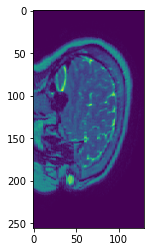

In [29]:
T2_image = img_T2.get_fdata()
# test_mask = 
fig, ax = plt.subplots()
ax.imshow(T2_image[80]//2)

### Load an MRA image

In [125]:
img_MRA = nib.load(bd_image_files_MRA[17])
img_MRA

In [31]:
img_MRA.get_fdata().shape

(512, 512, 100)

### Load a PD IMAGE

In [32]:
img_PD = nib.load(bd_image_files_PD[17])
img_PD

In [34]:
img_PD.get_fdata().shape

(256, 256, 130)

## Create Images for EDA/ understanding Data

#### Create T1 image

In [199]:
create_gif(nib.load(bd_image_files_T1[0]), title="T1 Scan .gif", filename="T1_MRI.gif")

TypeError: cannot unpack non-iterable Figure object

<Figure size 640x480 with 0 Axes>

MovieWriter ffmpeg unavailable; using Pillow instead.


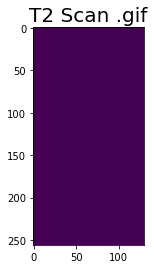

In [36]:
create_gif(img_T2, title='T2 Scan .gif', filename='T2_MRI.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


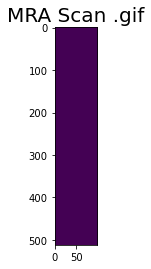

In [32]:
create_gif(img_MRA, title='MRA Scan .gif', filename='MRA_MRI.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


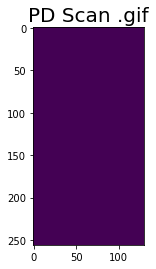

In [36]:
create_gif(img_PD, title='PD Scan .gif', filename='PD_MRI.gif')